In [32]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [33]:
#importing the data set
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<Axes: >

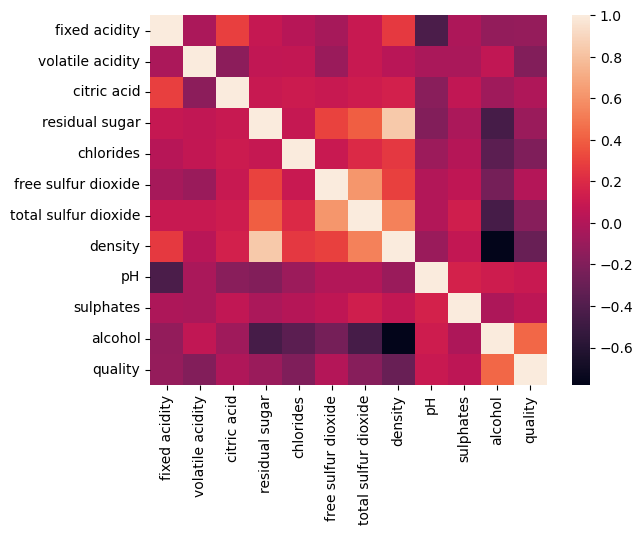

In [34]:
#Visualizeing the data
sns.heatmap(data.corr())


In [35]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

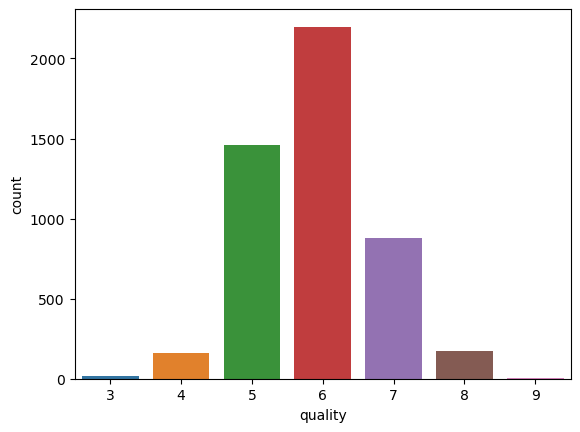

In [36]:
sns.countplot(x = data['quality'])

In [37]:
#divide data and target
X = data.drop(columns = 'quality')
y = data['quality']

In [38]:
#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 2)

In [39]:
#Generate the model
log_reg = LogisticRegression()

In [40]:
#Fit the data
log_reg.fit(X_train, y_train)

C:\Users\SanthoshKumar\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#predicting the model
y_pred = log_reg.predict(X_test)

In [42]:
#printing the accuracy
print("Accuracy Score : ", log_reg.score(X_test, y_test))
AS = accuracy_score(y_test, y_pred)

Accuracy Score :  0.4826530612244898


In [43]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   0   1   1   0   0   0]
 [  0   0  10  24   0   0   0]
 [  0   0  96 208   1   0   0]
 [  0   0  60 365   7   0   0]
 [  0   0  17 144  11   0   0]
 [  0   0   1  30   2   0   0]
 [  0   0   0   1   0   0   0]]


Text(70.72222222222221, 0.5, 'Actual Values')

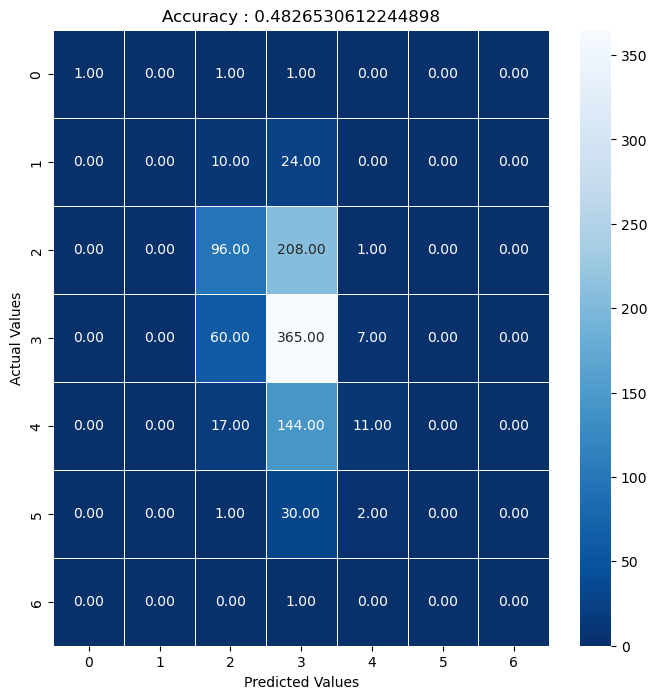

In [44]:
#Better visualization of confusion matrix
plt.figure(figsize= (8,8))
sns.heatmap(cm, annot = True, fmt = '.2f', linewidth = 0.5, cmap = 'Blues_r')
plt.title(f"Accuracy : {AS}")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")